# パスの設定

In [1]:
# colab使用時のマウント設定
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# メインディレクトリのパス
dir_path = '/content/drive/MyDrive/ml_10th_act4_setlist_wishful_thinking/'

# 必要なライブラリのインストール

In [3]:
!pip install ortools
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 45.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

# 必要なパッケージのimport

In [4]:
import json
import pprint
from ortools.linear_solver import pywraplp
import csv
import math
from itertools import combinations
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# データの読み込み

In [5]:
# MS, ASのキャスト名の読み込み
with open(dir_path + 'data/msas_cast.json', 'r') as json_file:
    msas_cast = json.load(json_file)

# 各日に参加するキャスト名の読み込み
with open(dir_path + 'data/day_id_cast.json', 'r') as json_file:
    day_id_cast = json.load(json_file)
    day_id_cast = {
        int(day_id): cast for day_id, cast in day_id_cast.items()
    }

# 曲名とキャスト名の読み込み
with open(
    dir_path +
    'data/song_cast_20240126_00.json',
    'r'
) as json_file:
    song_cast = json.load(json_file)

# 曲名とキャスト名（MSのみ）の読み込み
with open(
    dir_path +
    'data/song_cast_ms_only_20240126_00.json',
    'r'
) as json_file:
    song_cast_ms_only = json.load(json_file)

# 曲名と過去披露パラメータの読み込み
with open(
    dir_path +
    'data/song_performance_params_for_10th_act4_20240126_00.json',
    'r'
) as json_file:
    song_performance_params = json.load(json_file)

# キャスト名とその短縮形の辞書の読み込み
with open(
    dir_path +
    'data/cast_shortened_ms_only.json',
    'r'
) as json_file:
    cast_shortened = json.load(json_file)


# データの確認

In [6]:
# キャスト名
pprint.pprint(msas_cast, sort_dicts=False, width=40, compact=True)

{'MS': ['山崎はるか', '田所あずさ', 'Machico',
        '種田梨沙', '角元明日香', '大関英里',
        '藤井ゆきよ', '諏訪彩花', '麻倉もも',
        '小笠原早紀', '夏川椎菜', '中村温姫', '伊藤美来',
        '駒形友梨', '村川梨衣', '上田麗奈', '原嶋あかり',
        '小岩井ことり', '郁原ゆう', '雨宮天',
        '戸田めぐみ', '田村奈央', '木戸衣吹', '渡部優衣',
        '野村香菜子', '髙橋ミナミ', '稲川英里',
        '末柄里恵', '桐谷蝶々', '浜崎奈々', '阿部里果',
        '近藤唯', '山口立花子', '斉藤佑圭', '平山笑美',
        '渡部恵子', '愛美', '南早紀', '香里有佐'],
 'AS': ['中村繪里子', '今井麻美', '長谷川明子',
        '浅倉杏美', '仁後真耶子', '平田宏美', '釘宮理恵',
        '原由実', '若林直美', 'たかはし智秋', '下田麻美',
        '下田麻美', '沼倉愛美']}


In [7]:
# 各日に参加するキャスト名
pprint.pprint(day_id_cast, sort_dicts=False, width=40, compact=True)

{1: ['山崎はるか', 'Machico', '角元明日香',
     '大関英里', '藤井ゆきよ', '麻倉もも', '小笠原早紀',
     '夏川椎菜', '中村温姫', '伊藤美来', '駒形友梨',
     '原嶋あかり', '小岩井ことり', '郁原ゆう', '雨宮天',
     '田村奈央', '木戸衣吹', '渡部優衣', '野村香菜子',
     '稲川英里', '末柄里恵', '桐谷蝶々', '浜崎奈々',
     '阿部里果', '近藤唯', '山口立花子', '斉藤佑圭',
     '平山笑美', '渡部恵子', '愛美', '南早紀',
     '香里有佐'],
 2: ['山崎はるか', '田所あずさ', 'Machico',
     '種田梨沙', '角元明日香', '大関英里', '藤井ゆきよ',
     '諏訪彩花', '麻倉もも', '小笠原早紀', '夏川椎菜',
     '中村温姫', '伊藤美来', '駒形友梨', '村川梨衣',
     '上田麗奈', '原嶋あかり', '小岩井ことり', '郁原ゆう',
     '雨宮天', '戸田めぐみ', '田村奈央', '木戸衣吹',
     '渡部優衣', '野村香菜子', '髙橋ミナミ', '稲川英里',
     '末柄里恵', '桐谷蝶々', '浜崎奈々', '阿部里果',
     '近藤唯', '山口立花子', '斉藤佑圭', '平山笑美',
     '渡部恵子', '愛美', '南早紀', '香里有佐']}


In [8]:
# 曲名とキャスト名
pprint.pprint(song_cast, sort_dicts=False, width=80, compact=True)

{'...In The Name Of。 ...LOVE?': ['阿部里果'],
 'ABSOLUTE RUN!!!': ['山崎はるか', '田所あずさ', 'Machico'],
 'addicted': ['原由実'],
 'AIKANE？': ['小笠原早紀'],
 'Angelic Parade♪': ['Machico', '角元明日香', '麻倉もも', '小笠原早紀', '夏川椎菜', '田村奈央',
                     '髙橋ミナミ', '稲川英里', '末柄里恵', '桐谷蝶々', '近藤唯', '平山笑美', '香里有佐'],
 'Arrive You 〜それが運命でも〜': ['原嶋あかり', '稲川英里', '渡部恵子'],
 'ART NEEDS HEART BEATS': ['中村温姫'],
 'Be My Boy': ['山口立花子'],
 'Be proud': ['山崎はるか', '田所あずさ', 'Machico'],
 'Beat the World!!!': ['戸田めぐみ', '平田宏美'],
 'Beautiful Believer': ['藤井ゆきよ'],
 'Believe my change!': ['Machico'],
 'Bigバルーン◎': ['小笠原早紀', '髙橋ミナミ', '斉藤佑圭', '下田麻美'],
 'Birth of Color': ['戸田めぐみ', '木戸衣吹', '浅倉杏美', '平田宏美', 'たかはし智秋'],
 'bitter sweet': ['末柄里恵'],
 'Black★Party': ['小笠原早紀', '平山笑美'],
 'Blue Symphony': ['種田梨沙', '藤井ゆきよ', '雨宮天', '今井麻美'],
 'Bonnes! Bonnes!! Vacances!!!': ['Machico', '大関英里', '浜崎奈々'],
 'Border LINE→→→♡': ['山口立花子'],
 'BORN ON DREAM! 〜HANABI☆NIGHT〜': ['大関英里', '駒形友梨', '上田麗奈', '渡部優衣', '浜崎奈々'],
 'BOUNCING♪ SMILE!': ['稲川英里'],
 'Brand New The

In [9]:
# 曲名とキャスト名（MSのみ）
pprint.pprint(song_cast_ms_only, sort_dicts=False, width=80, compact=True)

{'...In The Name Of。 ...LOVE?': ['阿部里果'],
 'ABSOLUTE RUN!!!': ['山崎はるか', '田所あずさ', 'Machico'],
 'addicted': [],
 'AIKANE？': ['小笠原早紀'],
 'Angelic Parade♪': ['Machico', '角元明日香', '麻倉もも', '小笠原早紀', '夏川椎菜', '田村奈央',
                     '髙橋ミナミ', '稲川英里', '末柄里恵', '桐谷蝶々', '近藤唯', '平山笑美', '香里有佐'],
 'Arrive You 〜それが運命でも〜': ['原嶋あかり', '稲川英里', '渡部恵子'],
 'ART NEEDS HEART BEATS': ['中村温姫'],
 'Be My Boy': ['山口立花子'],
 'Be proud': ['山崎はるか', '田所あずさ', 'Machico'],
 'Beat the World!!!': ['戸田めぐみ'],
 'Beautiful Believer': ['藤井ゆきよ'],
 'Believe my change!': ['Machico'],
 'Bigバルーン◎': ['小笠原早紀', '髙橋ミナミ', '斉藤佑圭'],
 'Birth of Color': ['戸田めぐみ', '木戸衣吹'],
 'bitter sweet': ['末柄里恵'],
 'Black★Party': ['小笠原早紀', '平山笑美'],
 'Blue Symphony': ['種田梨沙', '藤井ゆきよ', '雨宮天'],
 'Bonnes! Bonnes!! Vacances!!!': ['Machico', '大関英里', '浜崎奈々'],
 'Border LINE→→→♡': ['山口立花子'],
 'BORN ON DREAM! 〜HANABI☆NIGHT〜': ['大関英里', '駒形友梨', '上田麗奈', '渡部優衣', '浜崎奈々'],
 'BOUNCING♪ SMILE!': ['稲川英里'],
 'Brand New Theater!': ['山崎はるか', '田所あずさ', 'Machico', '種田梨沙', '角元明日香', 

In [10]:
# 曲名と過去披露パラメータ
for key, value in song_performance_params.items():
    print(f"{key}: [")
    for performance in value:
        print(f'\t{performance},')
    print("],")
    # print()

...In The Name Of。 ...LOVE?: [
	{'anniv_period': 1, 'anniv_flag': 0, 'originalsong_flag': 1, 'originalmember_flag': 1},
	{'anniv_period': 1, 'anniv_flag': 0, 'originalsong_flag': 1, 'originalmember_flag': 1},
	{'anniv_period': 1, 'anniv_flag': 0, 'originalsong_flag': 1, 'originalmember_flag': 1},
	{'anniv_period': 3, 'anniv_flag': 1, 'originalsong_flag': 1, 'originalmember_flag': 1},
],
ABSOLUTE RUN!!!: [
	{'anniv_period': 8, 'anniv_flag': 1, 'originalsong_flag': 1, 'originalmember_flag': 1},
	{'anniv_period': 8, 'anniv_flag': 0, 'originalsong_flag': 1, 'originalmember_flag': 1},
	{'anniv_period': 8, 'anniv_flag': 0, 'originalsong_flag': 1, 'originalmember_flag': 1},
	{'anniv_period': 8, 'anniv_flag': 0, 'originalsong_flag': 1, 'originalmember_flag': 1},
	{'anniv_period': 9, 'anniv_flag': 0, 'originalsong_flag': 1, 'originalmember_flag': 1},
],
AIKANE？: [
	{'anniv_period': 4, 'anniv_flag': 0, 'originalsong_flag': 1, 'originalmember_flag': 1},
	{'anniv_period': 4, 'anniv_flag': 0, 'orig

# 披露期待ポイントの算出

## 定数の設定

In [11]:
# 披露期待ポイント算出用係数
## 現在の周年数
anniversary_count = 10
## 周年ライブ以外での披露に対する係数
non_anniversary_factor = 0.5
## 「オリジナル音源かつフル」でない披露に対する係数
non_full_original_song_factor = 0.5
## オリジナルのMSメンバーが揃わないメンバーでの披露に対する係数
non_original_ms_members_factor = 0.5

# 何人以上のメンバーによる楽曲を「大人数の楽曲」とするかの閾値
large_group_threshold = 7

## 過去披露データから披露期待ポイントを計算する関数の定義

In [12]:
def calculate_song_expectation_point(
        song_performance_params,
        anniversary_count,
        non_anniversary_factor,
        non_full_original_song_factor,
        non_original_ms_members_factor
):
    song_expectation_point = {}
    for song, performance_list in song_performance_params.items():
        expectation_point_list = []
        for performance in performance_list:
            minus_point = performance['anniv_period']
            if performance['anniv_flag'] == 0:
                minus_point *= non_anniversary_factor
            if performance['originalsong_flag'] == 0:
                minus_point *= non_full_original_song_factor
            if performance['originalmember_flag'] == 0:
                minus_point *= non_original_ms_members_factor
            expectation_point = anniversary_count - minus_point
            expectation_point_list.append(expectation_point)

        if len(expectation_point_list) == 0:
            song_expectation_point[song] = anniversary_count
        else:
            song_expectation_point[song] = min(expectation_point_list)

    return song_expectation_point

## 披露期待ポイントの算出、確認

In [13]:
song_expectation_point = calculate_song_expectation_point(
    song_performance_params,
    anniversary_count,
    non_anniversary_factor,
    non_full_original_song_factor,
    non_original_ms_members_factor
)

In [14]:
# 披露期待ポイントの確認
pprint.pprint(
    song_expectation_point,
    sort_dicts=False,
    width=80,
    compact=True
)

{'...In The Name Of。 ...LOVE?': 7,
 'ABSOLUTE RUN!!!': 2,
 'AIKANE？': 0,
 'Angelic Parade♪': 4,
 'Arrive You 〜それが運命でも〜': 2,
 'ART NEEDS HEART BEATS': 0,
 'Be My Boy': 0,
 'Be proud': 2,
 'Beautiful Believer': 1,
 'Believe my change!': 0,
 'Bigバルーン◎': 6.5,
 'Birth of Color': 7.5,
 'bitter sweet': 0,
 'Black★Party': 0,
 'Blue Symphony': 5.0,
 'Bonnes! Bonnes!! Vacances!!!': 6,
 'Border LINE→→→♡': 4,
 'BORN ON DREAM! 〜HANABI☆NIGHT〜': 4,
 'BOUNCING♪ SMILE!': 0,
 'Brand New Theater!': 0,
 'brave HARMONY': 3,
 'CAT CROSSING': 0,
 'Catch my dream': 4,
 'catch my feeling': 5.0,
 'CHEER UP! HEARTS UP!': 8.0,
 'Cherry Colored Love': 2,
 'Clover Days': 10,
 "Clover's Cry 〜神と神降ろしの少女〜": 8.0,
 'Collier De Perles': 1,
 'Come on a Tea Party!': 5,
 'Contrastet': 1,
 'Criminally Dinner 〜正餐とイーヴルナイフ〜': 8.0,
 'Cross the future': 1,
 'Crossing!': 0,
 'Cut. Cut. Cut.': 7,
 'Dance in the Light': 10,
 "dans l'obscurité": 6.0,
 'Day After “Yesterday”': 0,
 'dear...': 6,
 'Decided': 7,
 'DIAMOND DAYS': 4,
 'DIAM

## MS披露期待ポイントの計算

In [15]:
# ASメンバーがいないことによる披露期待ポイントの調整
# オリジナルメンバーにおけるMSメンバーの割合を掛ける
song_expectation_point_ms = {}
for song in song_expectation_point.keys():
    song_expectation_point_ms[song] = (
        song_expectation_point[song] *
        len(song_cast_ms_only[song]) /
        len(song_cast[song])
    )

In [16]:
# MSメンバーの割合を考慮した披露期待ポイントが高い順にソートして表示
song_expectation_point_ms_sorted = dict(
    sorted(
        song_expectation_point_ms.items(),
        key=lambda item: item[1],
        reverse=True
    )
)

pprint.pprint(
    song_expectation_point_ms_sorted,
    sort_dicts=False,
    width=80,
    compact=True
)

{'Clover Days': 10.0,
 'Dual Style Idol': 10.0,
 'Sing a Wing Song': 10.0,
 'Unknown Boxの開き方': 10.0,
 'わたしは花、あなたは太陽': 10.0,
 'アイドルは、かく語りき': 10.0,
 'エンダーエンダー': 10.0,
 'オレンジノキオク': 10.0,
 '美！美！美！ビルドUP!!': 10.0,
 'ミステイク・マーダー！': 10.0,
 'Like twinkling STARS': 8.333333333333334,
 'IGNITE': 8.25,
 'クルリウタ': 8.25,
 '花びらメモリーズ': 8.25,
 'Dance in the Light': 8.0,
 'Vacation VS Summer 〜ナツとヤスミのアンビバレント！〜': 8.0,
 'ミスティック・セレモニーへの招待状': 8.0,
 'ユニゾン☆ビート': 8.0,
 'リベレイシング／アロン -LiberaSing Along-': 8.0,
 '夢みがちBride': 8.0,
 '解夏傀儡': 8.0,
 'オレンジ・エピソード': 7.6923076923076925,
 'サウンド・オブ・ビギニング': 7.6923076923076925,
 'ターンオンタイム！': 7.5,
 '...In The Name Of。 ...LOVE?': 7.0,
 'Cut. Cut. Cut.': 7.0,
 'Decided': 7.0,
 'piece of cake': 7.0,
 'あのね、聞いてほしいことがあるんだ': 7.0,
 'エスケープ': 7.0,
 'ビギナーズ☆ストライク': 7.0,
 '空想文学少女': 7.0,
 'Supersonic Booster!': 6.923076923076923,
 '聖ミリオン女学園校歌': 6.666666666666667,
 'ワールド・アスレチック・COOK-KING 〜勝者必食！？スポ食の秋〜': 6.6,
 'Do the IDOL!! 〜断崖絶壁チュパカブラ〜': 6.5,
 "Clover's Cry 〜神と神降ろしの少女〜": 6.4,
 'Criminally Dinne

In [17]:
# ここまでの楽曲数
len(song_expectation_point_ms_sorted)

338

# 最終候補曲の抽出

In [18]:
# 指定して除外する曲名のリスト
## 全体曲、ラジオ曲、カバー曲は除外する
excluded_songs = [
    'Thank You!',
    'Welcome!!',
    'Dreaming!',
    'Brand New Theater!',
    'UNION!!',
    'Flyers!!!',
    'Glow Map',
    'Harmony 4 You',
    '夢にかけるRainbow',
    'Crossing!',
    'グッドサイン',
    'Rat A Tat!!!',
    'セブンカウント',
    'DIAMOND DAYS',
    'EVERYDAY STARS!!',
    'U・N・M・E・I ライブ',
    'ターンオンタイム！',
    'ENDLESS TOUR',
    'SECOND LIVINGROOM',
    'IGNITE'
]

In [19]:
## 処理1：指定された曲を除外する（ソートもしておく）
song_expectation_point_candidate_excluded_sorted = {
    song: song_expectation_point_ms_sorted[song]
    for song in song_expectation_point_ms_sorted.keys()
    if song not in excluded_songs
}

## 処理2：メンバーが完全一致する複数の楽曲がある場合、
### 披露期待ポイントが最も大きい1曲以外を候補曲から除外する

### メンバー完全一致楽曲の重複を確認するための集合
already_candidates_cast = set()

song_expectation_point_final_candidate_sorted = {}

for song in song_expectation_point_candidate_excluded_sorted.keys():
    if '、'.join(song_cast_ms_only[song]) in already_candidates_cast:
        continue
    already_candidates_cast.add('、'.join(song_cast_ms_only[song]))
    song_expectation_point_final_candidate_sorted[song] =\
        song_expectation_point_candidate_excluded_sorted[song]

# アルファベット・五十音順に戻した辞書
song_expectation_point_final_candidate = {
    song: song_expectation_point_ms[song]
    for song in song_expectation_point_ms.keys()
    if song in song_expectation_point_final_candidate_sorted
}

pprint.pprint(
    song_expectation_point_final_candidate,
    sort_dicts=False,
    width=80,
    compact=True
)

{'...In The Name Of。 ...LOVE?': 7.0,
 'ABSOLUTE RUN!!!': 2.0,
 'Angelic Parade♪': 4.0,
 'Arrive You 〜それが運命でも〜': 2.0,
 'Bigバルーン◎': 4.875,
 'Birth of Color': 3.0,
 'Blue Symphony': 3.75,
 'Bonnes! Bonnes!! Vacances!!!': 6.0,
 'BORN ON DREAM! 〜HANABI☆NIGHT〜': 4.0,
 'brave HARMONY': 3.0,
 'catch my feeling': 5.0,
 'CHEER UP! HEARTS UP!': 6.0,
 'Cherry Colored Love': 2.0,
 'Clover Days': 10.0,
 "Clover's Cry 〜神と神降ろしの少女〜": 6.4,
 'Come on a Tea Party!': 5.0,
 'Contrastet': 1.0,
 'Criminally Dinner 〜正餐とイーヴルナイフ〜': 6.4,
 'Cut. Cut. Cut.': 7.0,
 'Dance in the Light': 8.0,
 "dans l'obscurité": 6.0,
 'dear...': 6.0,
 'Decided': 7.0,
 'DIAMOND JOKER': 4.875,
 'Do the IDOL!! 〜断崖絶壁チュパカブラ〜': 6.5,
 'Dreamscape': 0.0,
 'Dual Style Idol': 10.0,
 'ENTER→PLEASURE': 5.0,
 'Episode. Tiara': 4.0,
 'ESPADA': 4.230769230769231,
 'Eternal Harmony': 4.0,
 'Everlasting': 4.0,
 'FairyTaleじゃいられない': 4.0,
 'FIND YOUR WIND!': 4.0,
 'fruity love': 0.0,
 'Fu-Wa-Du-Wa': 4.25,
 'Get lol! Get lol! SONG': 4.0,
 'Girl meets Wo

In [20]:
# 参考：重複を取り除いたキャスト組合せの集合
pprint.pprint(already_candidates_cast, sort_dicts=False, width=80, compact=True)

{'Machico', 'Machico、上田麗奈', 'Machico、伊藤美来、小岩井ことり、郁原ゆう、斉藤佑圭',
 'Machico、大関英里、浜崎奈々', 'Machico、小岩井ことり、木戸衣吹、平山笑美', 'Machico、小笠原早紀、近藤唯',
 'Machico、平山笑美、愛美', 'Machico、種田梨沙、諏訪彩花、麻倉もも、中村温姫、渡部優衣、野村香菜子、稲川英里、桐谷蝶々、渡部恵子',
 'Machico、藤井ゆきよ、諏訪彩花',
 'Machico、角元明日香、大関英里、夏川椎菜、中村温姫、原嶋あかり、郁原ゆう、田村奈央、木戸衣吹、渡部優衣、浜崎奈々、山口立花子、香里有佐',
 'Machico、角元明日香、麻倉もも、小笠原早紀、夏川椎菜、田村奈央、髙橋ミナミ、稲川英里、末柄里恵、桐谷蝶々、近藤唯、平山笑美、香里有佐',
 'Machico、阿部里果、愛美', 'Machico、麻倉もも、中村温姫、戸田めぐみ、平山笑美', '上田麗奈', '上田麗奈、原嶋あかり',
 '上田麗奈、浜崎奈々、阿部里果、近藤唯、山口立花子', '上田麗奈、渡部優衣、桐谷蝶々、阿部里果', '中村温姫',
 '中村温姫、戸田めぐみ、斉藤佑圭、渡部恵子', '中村温姫、村川梨衣、渡部優衣、野村香菜子、髙橋ミナミ、渡部恵子', '中村温姫、野村香菜子、渡部恵子',
 '伊藤美来', '伊藤美来、村川梨衣、原嶋あかり', '伊藤美来、髙橋ミナミ、渡部恵子', '南早紀', '南早紀、香里有佐', '原嶋あかり',
 '原嶋あかり、小岩井ことり', '原嶋あかり、木戸衣吹、稲川英里', '原嶋あかり、稲川英里、渡部恵子', '原嶋あかり、髙橋ミナミ、阿部里果、渡部恵子',
 '夏川椎菜', '夏川椎菜、上田麗奈、南早紀', '夏川椎菜、中村温姫、伊藤美来、阿部里果、斉藤佑圭', '夏川椎菜、伊藤美来',
 '夏川椎菜、木戸衣吹、山口立花子', '夏川椎菜、木戸衣吹、愛美', '夏川椎菜、田村奈央、愛美', '大関英里', '大関英里、伊藤美来、小岩井ことり',
 '大関英里、原嶋あかり、戸田めぐみ、近藤唯', '大関英里、原嶋あかり、田村奈央、髙橋ミナミ',
 '大関英里、夏川椎菜、伊藤美来、駒形友梨、村川梨衣、小岩井ことり、木戸衣吹、浜崎奈々、平山笑美、愛美', 

In [21]:
# 最終候補曲数
len(song_expectation_point_final_candidate)

176

In [22]:
# 各日に披露可能か否かを表す辞書
song_is_possible_performance = {}
for day_id in day_id_cast.keys():
    song_is_possible_performance[day_id] = {}
    for song in song_expectation_point_final_candidate_sorted.keys():
        # MSキャストが全員いる場合、1
        song_is_possible_performance[day_id][song] = 1
        for cast in song_cast_ms_only[song]:
            if cast not in day_id_cast[day_id]:
                # 全員揃ってはいないがオリジナルメンバー数が
                ## 大人数曲判定閾値以上の場合、0.5
                if large_group_threshold <= len(song_cast[song]):
                    song_is_possible_performance[day_id][song] = 0.5
                # そうでない場合、0
                else:
                    song_is_possible_performance[day_id][song] = 0
                break

pprint.pprint(
    song_is_possible_performance,
    sort_dicts=False,
    width=80,
    compact=True
)

{1: {'Clover Days': 0,
     'Dual Style Idol': 0,
     'Sing a Wing Song': 0,
     'Unknown Boxの開き方': 0,
     'わたしは花、あなたは太陽': 0,
     'アイドルは、かく語りき': 0,
     'エンダーエンダー': 0,
     'オレンジノキオク': 0,
     '美！美！美！ビルドUP!!': 0,
     'ミステイク・マーダー！': 0,
     'Like twinkling STARS': 0.5,
     'クルリウタ': 1,
     '花びらメモリーズ': 1,
     'Dance in the Light': 0,
     'Vacation VS Summer 〜ナツとヤスミのアンビバレント！〜': 0,
     'ミスティック・セレモニーへの招待状': 1,
     'リベレイシング／アロン -LiberaSing Along-': 0,
     '夢みがちBride': 0,
     '解夏傀儡': 0,
     'オレンジ・エピソード': 0.5,
     'サウンド・オブ・ビギニング': 0.5,
     '...In The Name Of。 ...LOVE?': 1,
     'Cut. Cut. Cut.': 1,
     'Decided': 0,
     'piece of cake': 1,
     'あのね、聞いてほしいことがあるんだ': 1,
     'エスケープ': 1,
     'ビギナーズ☆ストライク': 1,
     '空想文学少女': 1,
     'Supersonic Booster!': 0.5,
     '聖ミリオン女学園校歌': 1,
     'ワールド・アスレチック・COOK-KING 〜勝者必食！？スポ食の秋〜': 0,
     'Do the IDOL!! 〜断崖絶壁チュパカブラ〜': 1,
     "Clover's Cry 〜神と神降ろしの少女〜": 0,
     'Criminally Dinner 〜正餐とイーヴルナイフ〜': 0,
     'Girl meets Wonder': 0,
     '紙・心

In [23]:
# 1日目の候補楽曲数
sum(1 for song, flag in song_is_possible_performance[1].items() if 0 < flag)

104

# 最終候補曲のCSV出力
## 係数を変更したときの目視確認用
## ※MS披露期待ポイントが高い順→アルファベット・五十音順でソートした時の順番を「候補曲ID」とする

In [24]:
# # アルファベット・五十音の最終候補曲リスト
# with open(
#     dir_path + 'output/final_candidate_songs.csv',
#     'w',
#     encoding='utf-8',
#     newline=''
# ) as csvfile:
#     csv_writer = csv.writer(csvfile)
#     csv_writer.writerow(
#         ['-', '楽曲名', 'MS披露期待ポイント'] +
#         [f'Day{day_id}' for day_id in song_is_possible_performance.keys()] +
#         ['キャスト']
#     )

#     for i, (song, point) in enumerate(
#         song_expectation_point_final_candidate.items(),
#         start=1
#     ):
#         if len(song_cast_ms_only[song]) < len(msas_cast['MS']):
#             casts_str = '、'.join(song_cast_ms_only[song])
#         else:
#             casts_str = '【全員】'

#         day_id_marks = {}
#         for day_id in song_is_possible_performance.keys():
#             if song_is_possible_performance[day_id][song] == 1:
#                 day_id_marks[day_id] = '○'
#             elif song_is_possible_performance[day_id][song] == 0.5:
#                 day_id_marks[day_id] = '△'
#             else:
#                 day_id_marks[day_id] = '×'

#         csv_writer.writerow(
#             [i, song, point] +
#             [day_id_marks[day_id] for day_id in day_id_marks.keys()] +
#             [casts_str]
#         )

In [25]:
# # MS披露期待ポイントでソートした最終候補曲リスト
# with open(
#     dir_path + 'output/final_candidate_songs_sorted_by_point.csv',
#     'w',
#     encoding='utf-8',
#     newline=''
# ) as csvfile:
#     csv_writer = csv.writer(csvfile)
#     csv_writer.writerow(
#         ['候補曲ID', '楽曲名', 'MS披露期待ポイント'] +
#         [f'Day{day_id}' for day_id in song_is_possible_performance.keys()] +
#          ['キャスト']
#     )

#     for i, (song, point) in enumerate(
#         song_expectation_point_final_candidate_sorted.items(),
#         start=1
#     ):
#         if len(song_cast_ms_only[song]) < len(msas_cast['MS']):
#             casts_str = '、'.join(song_cast_ms_only[song])
#         else:
#             casts_str = '【全員】'

#         day_id_marks = {}
#         for day_id in song_is_possible_performance.keys():
#             if song_is_possible_performance[day_id][song] == 1:
#                 day_id_marks[day_id] = '○'
#             elif song_is_possible_performance[day_id][song] == 0.5:
#                 day_id_marks[day_id] = '△'
#             else:
#                 day_id_marks[day_id] = '×'

#         csv_writer.writerow(
#             [i, song, point] +
#             [day_id_marks[day_id] for day_id in day_id_marks.keys()] +
#             [casts_str]
#         )

# 最適化準備

# 定数の設定

In [26]:
# 最適化実行ID（結果出力ファイルの名前に付く識別子）
opt_id = '20240204_c07_010min'
# 最適化実行秒数
OPTIMIZATION_RUNTIME_SECONDS = 10 * 60

# ライブの日数
LIVE_DAYS = 2

# 1日あたりの（全体曲以外の）披露楽曲数
SONGS_PERFORMANCE_DAILY = 27

# 最終候補曲数
SONGS_CANDIDATES = len(song_expectation_point_final_candidate_sorted)

# キャストが披露する曲と曲の間隔の最小値
MIN_INTERVAL_BETWEEN_SONGS = 3

# 同日に披露される場合、披露順に制約がある楽曲のリスト
## MTS, MTS Finalについては、同日披露有無制約にも使用

## MTS
MTS_team_songs =[
    'ダイヤモンド・クラリティ',
    'Shamrock Vivace',
    '空色♡ Birthday Card',
    'ESPADA'
]

## MTS Final
MTS_final_team_songs = [
    'サウンド・オブ・ビギニング',
    'Supersonic Booster!',
    'オレンジ・エピソード',
    'Like twinkling STARS'
]

## MAT チーム曲
MAT_songs = [
    'Star Impression',
    '海風とカスタネット',
    'オレンジノキオク',
    'catch my feeling',
    'バトンタッチ',
    'Unknown Boxの開き方',
    'トワラー',
    'REFRAIN REL@TION'
]

## 同日に披露されるか否かを一致させたい曲リストのリスト
songs_exist_same_day = [
    MTS_team_songs,
    MTS_final_team_songs,
]

## 同日に披露される場合に披露順を指定したい曲リストのリスト
songs_in_orders = [
    MTS_team_songs,
    MTS_final_team_songs,
    MAT_songs
]

## 同日に披露される場合に披露を連続にしたい曲リストのリスト
sequence_songs = [
    MTS_team_songs,
    MTS_final_team_songs
]

## 披露してほしい曲のリスト
requested_songs = []
### 設定例
# requested_songs = [
#     'Clover Days',
#     'Dual Style Idol',
#     'Unknown Boxの開き方',
#     'アイドルは、かく語りき',
#     'ミステイク・マーダー！',
#     'ミスティック・セレモニーへの招待状',
#     'CHEER UP! HEARTS UP!',
#     "dans l'obscurité",
#     'スペードのQ',
#     '春風満帆スターティング',
#     '産声とクラブ',
#     'LOVE is GAME',
#     'STEREOPHONIC ISOTONIC',
#     'ラスト・アクトレス',
#     'VOY@GER'
# ]


# 曲順が後半になるほど掛かる披露期待ポイントボーナス係数の最大値
performance_num_factors = {
    j: (1 + 1 * j / SONGS_PERFORMANCE_DAILY)
    for j in range(1, SONGS_PERFORMANCE_DAILY+1)
}

## キャストの各日および合計の楽曲披露数の設定

In [27]:
# 以下のように定める
## 2日間参加するキャストは、各日2～3曲、2日合計5曲
## Day2のみ参加するキャストは、Day2で3曲
## ただし、戸田めぐみさんは「内容を一部制限」という公式発表があるので、
### Day2で1曲と設定

cast_performance_num_setting = {}
for cast in msas_cast['MS']:
    if cast in day_id_cast[1]:
        cast_performance_num_setting[cast] = {
            'daily': {1: {'min': 2, 'max': 3}, 2: {'min': 2, 'max': 3}},
            'total': {'min': 5, 'max': 5},
            'large_group_attendance_flag': 1
        }
    else:
        cast_performance_num_setting[cast] = {
            'daily': {1: {'min': 0, 'max': 0}, 2: {'min': 3, 'max': 3}},
            'total': {'min': 3, 'max': 3},
            'large_group_attendance_flag': 1
        }

cast_performance_num_setting['戸田めぐみ'] = {
    'daily': {1: {'min': 0, 'max': 0}, 2: {'min': 1, 'max': 1}},
    'total': {'min': 1, 'max': 1},
            'large_group_attendance_flag': 0
}

pprint.pprint(
    cast_performance_num_setting,
    sort_dicts=False,
    width=80,
    compact=True
)

{'山崎はるか': {'daily': {1: {'min': 2, 'max': 3}, 2: {'min': 2, 'max': 3}},
           'total': {'min': 5, 'max': 5},
           'large_group_attendance_flag': 1},
 '田所あずさ': {'daily': {1: {'min': 0, 'max': 0}, 2: {'min': 3, 'max': 3}},
           'total': {'min': 3, 'max': 3},
           'large_group_attendance_flag': 1},
 'Machico': {'daily': {1: {'min': 2, 'max': 3}, 2: {'min': 2, 'max': 3}},
             'total': {'min': 5, 'max': 5},
             'large_group_attendance_flag': 1},
 '種田梨沙': {'daily': {1: {'min': 0, 'max': 0}, 2: {'min': 3, 'max': 3}},
          'total': {'min': 3, 'max': 3},
          'large_group_attendance_flag': 1},
 '角元明日香': {'daily': {1: {'min': 2, 'max': 3}, 2: {'min': 2, 'max': 3}},
           'total': {'min': 5, 'max': 5},
           'large_group_attendance_flag': 1},
 '大関英里': {'daily': {1: {'min': 2, 'max': 3}, 2: {'min': 2, 'max': 3}},
          'total': {'min': 5, 'max': 5},
          'large_group_attendance_flag': 1},
 '藤井ゆきよ': {'daily': {1: {'min': 2, 'max'

## 制約条件設定に必要な変数の準備

In [28]:
# キャストと担当楽曲リストの辞書
cast_songs = {cast: [] for cast in msas_cast['MS']}
for song in song_expectation_point_final_candidate_sorted.keys():
    for cast in song_cast_ms_only[song]:
        cast_songs[cast].append(song)

pprint.pprint(
    cast_songs,
    sort_dicts=False,
    width=80,
    compact=True
)

{'山崎はるか': ['ミステイク・マーダー！', 'Like twinkling STARS', 'Starry Melody', 'ショコラブル＊イブ',
           'メメント？モメント♪ルルルルル☆', 'シークレットジュエル 〜魅惑の金剛石〜', 'Episode. Tiara',
           'Princess Be Ambitious!!', 'ダイヤモンド・クラリティ', 'Growing Storm!', '未来飛行',
           'ABSOLUTE RUN!!!', 'PRETTY DREAMER', 'REFRAIN REL@TION'],
 '田所あずさ': ['Like twinkling STARS', 'Criminally Dinner 〜正餐とイーヴルナイフ〜',
           'Precious Grain', 'プリムラ', '春風満帆スターティング', '（※「悪役？令嬢」楽曲）',
           'Legend Girls!!', 'Shooting Stars', 'ESPADA', 'FairyTaleじゃいられない',
           'オーディナリィ・クローバー', '餞の鳥', 'brave HARMONY', 'ABSOLUTE RUN!!!',
           'REFRAIN REL@TION'],
 'Machico': ['エンダーエンダー', 'ミスティック・セレモニーへの招待状', 'サウンド・オブ・ビギニング',
             'Do the IDOL!! 〜断崖絶壁チュパカブラ〜', 'Bonnes! Bonnes!! Vacances!!!',
             '恋のLesson初級編', 'DIAMOND JOKER', 'Marionetteは眠らない',
             'Angelic Parade♪', 'ハルマチ女子', 'ダイヤモンド・クラリティ', 'Growing Storm!',
             'インヴィンシブル・ジャスティス', 'サンリズム・オーケストラ♪', 'ABSOLUTE RUN!!!',
             'REFRAIN REL@TION', 'アイ

In [29]:
# 楽曲、キャストについて、それぞれ0始まりのIDを振る
song_id = {song: i for i, song in enumerate(song_expectation_point_final_candidate_sorted.keys(), start=1)}
id_song = {i: song for i, song in enumerate(song_expectation_point_final_candidate_sorted.keys(), start=1)}

cast_id = {cast: i for i, cast in enumerate(msas_cast['MS'], start=1)}
id_cast = {i: cast for i, cast in enumerate(msas_cast['MS'], start=1)}

## 関数の定義

In [30]:
# 割り当ての決定変数の作成
def create_assignments_vars(solver, n_days, n_performances, n_songs):
    assignments = {}
    for i in range(1, n_days+1):
        for j in range(1, n_performances+1):
            for k in range(1, n_songs+1):
                assignments[i, j, k] = solver.BoolVar(
                    f"assignments_i{i}_j{j}_k{k}"
                )
    return assignments


# 目的関数用ターゲット変数の作成
def create_eval_target_vars(solver):
    eval_target = solver.NumVar(0, solver.infinity(), "eval_target")
    return eval_target


# 制約01: 1つの披露枠[i, j]に対して1つの楽曲kのみが配置される制約
def add_one_song_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    assignments
):
    for i in range(1, n_days+1):
        for j in range(1, n_performances+1):
            sum_assignments = 0
            for k in range(1, n_songs+1):
                sum_assignments += assignments[i, j, k]
            solver.Add(sum_assignments == 1)


# 制約02: 全ての披露枠[i, j]を通して楽曲kは1回以下しか披露されない制約
def add_one_performance_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    assignments
):
    for k in range(1, n_songs+1):
        sum_assignments = 0
        for i in range(1, n_days+1):
            for j in range(1, n_performances+1):
                sum_assignments += assignments[i, j, k]
        solver.Add(sum_assignments <= 1)


# 制約03: 各キャストの楽曲披露数の制約
def add_cast_performance_num_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    id_song,
    cast_songs,
    song_cast,
    cast_pns,
    lg_threshold,
    assignments
):
    # 各日の披露曲数の制約
    for cast in cast_songs.keys():
        daily_nums = {}
        for i in range(1, n_days+1):
            daily_nums[i] = 0
            for j in range(1, n_performances+1):
                for k in range(1, n_songs+1):
                    if id_song[k] not in cast_songs[cast]:
                        continue
                    if (
                        lg_threshold <= len(song_cast[id_song[k]]) and
                        cast_pns[cast]['large_group_attendance_flag'] == 0
                        ):
                        continue
                    # 大人数楽曲はメンバーが揃っていない日でも披露可能とする
                    if (
                        lg_threshold <= len(song_cast[id_song[k]]) and
                        cast_pns[cast]['daily'][i]['max'] == 0
                        ):
                        continue
                    daily_nums[i] += assignments[i, j, k]
            solver.Add(cast_pns[cast]['daily'][i]['min'] <= daily_nums[i])
            solver.Add(daily_nums[i] <= cast_pns[cast]['daily'][i]['max'])
        total_assignments_num = sum(daily_nums[i] for i in daily_nums.keys())
        solver.Add(cast_pns[cast]['total']['min'] <= total_assignments_num)
        solver.Add(total_assignments_num <= cast_pns[cast]['total']['max'])


# 制約04: 各キャストの楽曲披露間隔の制約
def add_cast_performance_interval_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    id_song,
    cast_songs,
    song_cast,
    cast_pns,
    lg_threshold,
    min_interval,
    assignments
):
    for i in range(1, n_days+1):
        for cast in day_id_cast[i]:
            for j in range(1, n_performances+1-min_interval):
                performance_num = 0
                for l in range(min_interval+1):
                    for k in range(1, n_songs+1):
                        if id_song[k] not in cast_songs[cast]:
                            continue
                        if (
                            lg_threshold <= len(song_cast[id_song[k]]) and
                            cast_pns[cast]['large_group_attendance_flag'] == 0
                        ):
                            continue
                        performance_num += assignments[i, j+l, k]
                solver.Add(performance_num <= 1)


# 制約05: 指定された楽曲リストについてi日目で披露されるか否かが一致する制約
def add_songs_exist_same_day_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    song_id,
    songs_esd,
    assignments
):
    for one_songs_esd in songs_esd:
        for i in range(1, n_days+1):
            # combinationsを使ってl1とl2の組み合わせを生成
            for l1, l2 in combinations(range(len(one_songs_esd)), 2):
                song_id_l1 = song_id[one_songs_esd[l1]]
                song_id_l2 = song_id[one_songs_esd[l2]]
                l1_performance_flag = 0
                l2_performance_flag = 0
                for j in range(1, n_performances+1):
                    l1_performance_flag += assignments[i, j, song_id_l1]
                    l2_performance_flag += assignments[i, j, song_id_l2]
                solver.Add(
                    l1_performance_flag == l2_performance_flag
                )

# 制約06: 指定された楽曲リストについてi日の中での楽曲披露順序を守る制約
def add_songs_in_order_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    song_id,
    songs_io,
    assignments
):
    ## i日目に楽曲kが披露される曲順の整数jが入る変数
    ### （披露されない場合は0が入る）
    order = {}
    for i in range(1, n_days+1):
        for k in range(1, n_songs+1):
            order[i, k] = 0
            for j in range(1, n_performances+1):
                order[i, k] += j * assignments[i, j, k]

    for one_songs_io in songs_io:
        for i in range(1, n_days+1):
            for l1, l2 in combinations(range(len(one_songs_io)), 2):
                s_id_l1 = song_id[one_songs_io[l1]]
                s_id_l2 = song_id[one_songs_io[l2]]
                l2_performance_flag = 0
                for j in range(1, n_performances+1):
                    l2_performance_flag += assignments[i, j, s_id_l2]
                solver.Add(
                    order[i, s_id_l1] - order[i, s_id_l2] <=
                    n_performances * (1 - l2_performance_flag)
                )


# 制約07: 指定された楽曲リストについて、連続で披露する制約
def add_sequence_songs_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    song_id,
    sequence_songs,
    assignments
):
    for one_sequence_songs in sequence_songs:
        for l in range(len(one_sequence_songs)-1):
            former_song_id = song_id[one_sequence_songs[l]]
            latter_song_id = song_id[one_sequence_songs[l+1]]
            for i in range(1, n_days+1):
                for j in range(1, n_performances+1-1):
                    solver.Add(
                        assignments[i, j, former_song_id] ==
                        assignments[i, j+1, latter_song_id]
                    )


# 制約21: 指定された楽曲リストについて日程全体で披露されるか否かが一致する制約
## 今回は不使用
def add_all_songs_exist_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    song_id,
    songs_esd,
    assignments
):
    for one_songs_esd in songs_esd:
        # combinationsを使ってl1とl2の組み合わせを生成
        for l1, l2 in combinations(range(len(one_songs_esd)), 2):
            song_id_l1 = song_id[one_songs_esd[l1]]
            song_id_l2 = song_id[one_songs_esd[l2]]
            l1_performance_flag = 0
            l2_performance_flag = 0
            for i in range(1, n_days+1):
                for j in range(1, n_performances+1):
                    l1_performance_flag += assignments[i, j, song_id_l1]
                    l2_performance_flag += assignments[i, j, song_id_l2]
            solver.Add(
                l1_performance_flag == l2_performance_flag
            )


# 制約99: 指定された楽曲リストについて全て披露する制約
def add_requested_songs_constraint(
    solver,
    n_days,
    n_performances,
    song_id,
    requested_songs,
    assignments
):
    for song in requested_songs:
        performance_flag = 0
        for i in range(1, n_days+1):
            for j in range(1, n_performances+1):
                performance_flag += assignments[i, j, song_id[song]]
        solver.Add(performance_flag == 1)


# ----- 目的関数 -----

# 目的関数用ターゲット変数の制約
def add_eval_target_constraint(
    solver,
    n_days,
    n_performances,
    n_songs,
    song_point,
    id_song,
    pn_factors,
    assignments,
    eval_target
):
    sum_for_target = 0
    for i in range(1, n_days+1):
        for j in range(1, n_performances+1):
            for k in range(1, n_songs+1):
                # j曲目は (1.0 + p_factor + j / n_performances)倍の
                ## ポイント加点とする
                ## これにより披露期待ポイントが高い曲ほど後半に配置される
                sum_for_target += (
                    assignments[i, j, k] *
                    song_point[id_song[k]] *
                    pn_factors[j]
                )
    solver.Add(eval_target <= sum_for_target)


# 目的関数を最大化するよう設定する関数
def set_objective_eval_target_maximize(solver, eval_target):
    objective = solver.Objective()
    # 変数に係数1を設定
    objective.SetCoefficient(eval_target, 1)
    # 目的関数を最大化するように設定
    objective.SetMaximization()

# 最適化

## ソルバーのインスタンス作成、パラメータ設定

In [31]:
# SCIPを使用してソルバーのインスタンスを作成する
solver = pywraplp.Solver.CreateSolver("SCIP")

# ログを出力する設定
solver.EnableOutput()

# 時間制限を設定 (ミリ秒単位)
solver.SetTimeLimit(OPTIMIZATION_RUNTIME_SECONDS * 1000)

## 変数の作成

In [32]:
# 決定変数の作成
assignments = create_assignments_vars(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES
)

# 目的関数ターゲット変数の作成
eval_target = create_eval_target_vars(solver)

## 制約条件、目的関数の設定

In [33]:
# 制約の追加

## 制約01: 1つの披露枠[i, j]に対して1つの楽曲kのみが配置される制約
add_one_song_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES,
    assignments=assignments
)


## 制約02: 全ての披露枠[i, j]を通して楽曲kは1回以下しか披露されない制約
add_one_performance_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES,
    assignments=assignments
)


## 制約03: 各キャストの楽曲披露数の制約
add_cast_performance_num_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES,
    id_song=id_song,
    cast_songs=cast_songs,
    song_cast=song_cast_ms_only,
    cast_pns=cast_performance_num_setting,
    lg_threshold=large_group_threshold,
    assignments=assignments
)


## 制約04: 各キャストの楽曲披露間隔の制約
add_cast_performance_interval_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES,
    id_song=id_song,
    cast_songs=cast_songs,
    song_cast=song_cast_ms_only,
    cast_pns=cast_performance_num_setting,
    lg_threshold=large_group_threshold,
    min_interval=MIN_INTERVAL_BETWEEN_SONGS,
    assignments=assignments
)


## 制約05: 指定された楽曲リストについてi日目で披露されるか否かが一致する制約
add_songs_exist_same_day_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES,
    song_id=song_id,
    songs_esd=songs_exist_same_day,
    assignments=assignments
)


## 制約06: 指定された楽曲リストについてi日の中での楽曲披露順序を守る制約
add_songs_in_order_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES,
    song_id=song_id,
    songs_io=songs_in_orders,
    assignments=assignments
)


# 制約07: 指定された楽曲リストについて、連続で披露する制約
add_sequence_songs_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES,
    song_id=song_id,
    sequence_songs=sequence_songs,
    assignments=assignments
)


# 制約99: 指定された楽曲リストについて全て披露する制約
add_requested_songs_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    song_id=song_id,
    requested_songs=requested_songs,
    assignments=assignments
)

# ----------

# 目的関数

## 目的関数用ターゲット変数の制約
add_eval_target_constraint(
    solver,
    n_days=LIVE_DAYS,
    n_performances=SONGS_PERFORMANCE_DAILY,
    n_songs=SONGS_CANDIDATES,
    song_point=song_expectation_point_final_candidate_sorted,
    id_song=id_song,
    pn_factors=performance_num_factors,
    assignments=assignments,
    eval_target = eval_target
)

## 目的関数を最大化するよう設定する関数
set_objective_eval_target_maximize(solver, eval_target)

## 変数、制約条件の数の確認

In [34]:
# 変数の数と制約条件の数
print('# 変数の数 =', solver.NumVariables())
print('# 制約条件の数 =', solver.NumConstraints())

# 変数の数 = 9505
# 制約条件の数 = 2585


## 最適化の実行

In [35]:
# 最適化問題を解く
print("# 最適化実行スタート（最大{}秒）".format(OPTIMIZATION_RUNTIME_SECONDS))
status = solver.Solve()
print("# 最適化実行終了")

# 結果を表示する
if status == pywraplp.Solver.OPTIMAL:
    print('# 最適解が見つかりました。')
elif status == pywraplp.Solver.FEASIBLE:
    print("# 制限時間内に実行可能な解が見つかりました。")
else:
    print("# 制限時間内に解が見つかりませんでした。")

print('## 目的関数値 =', solver.Objective().Value())

# 最適化実行スタート（最大600秒）
# 最適化実行終了
# 制限時間内に実行可能な解が見つかりました。
## 目的関数値 = 562.8177825261158


# 結果の可視化

In [36]:
# i日目のj曲目に披露される楽曲kを格納する辞書の作成
result = {}
for i in range(1, LIVE_DAYS+1):
    for j in range(1, SONGS_PERFORMANCE_DAILY+1):
        for k in range(1, SONGS_CANDIDATES+1):
            if assignments[i, j, k].solution_value() == 1:
                result[i, j] = id_song[k]

## 詳細結果の辞書の作成、テキストでの可視化

In [37]:
# 各キャストの各日の楽曲披露数の辞書
cast_stage = {}
for cast in cast_id.keys():
    cast_stage[cast] = {l:0 for l in day_id_cast.keys()}
    cast_stage[cast]['total'] = 0

# DataFrame用に詳細結果を格納する辞書
results_for_df = {}

daily_accumulated_points = {l:0 for l in day_id_cast.keys()}
accumulated_points = 0

columns_for_notebook = [
    'Day',
    '曲順',
    '候補曲ID',
    '披露期待ポイント',
    '曲順補正済み披露期待ポイント',
    '日付別補正済みポイント累計',
    '補正済みポイント累計',
    '楽曲名',
    'キャスト'
]

print(columns_for_notebook)

for idx, ((i, j), song) in enumerate(result.items()):
    results_row = {}

    se_point = song_expectation_point_final_candidate_sorted[song]
    se_point_f = se_point * performance_num_factors[j]
    daily_accumulated_points[i] += se_point_f
    accumulated_points += se_point_f

    results_row['Day'] = i
    results_row['曲順'] = j
    results_row['候補曲ID'] = song_id[song]
    results_row['披露期待ポイント'] = se_point
    results_row['曲順補正済み披露期待ポイント'] = se_point_f
    results_row['日付別補正済みポイント累計'] = daily_accumulated_points[i]
    results_row['補正済みポイント累計'] = accumulated_points
    results_row['楽曲名'] = song

    # 大人数楽曲のキャストを調整
    cast_of_the_day = []
    for cast in song_cast_ms_only[song]:
        pns = cast_performance_num_setting[cast]
        if (
            large_group_threshold <= len(song_cast_ms_only[song]) and
            pns['daily'][i]['max'] == 0
        ):
            continue
        if (
            large_group_threshold <= len(song_cast_ms_only[song]) and
            pns['large_group_attendance_flag'] == 0
        ):
            continue
        cast_of_the_day.append(cast)
    results_row['キャスト'] = cast_of_the_day

    for cast in cast_songs.keys():
        results_row[cast_shortened[cast]] = None
        if cast in cast_of_the_day:
            cast_stage[cast][i] += 1
            cast_stage[cast]['total'] += 1
            results_row[cast_shortened[cast]] = (
                f"{cast_stage[cast][i]}" +
                f"({cast_stage[cast]['total']})" +
                f"; {len(cast_of_the_day)}"
            )

    if song in requested_songs:
        results_row['楽曲名'] += ' <req.>'

    results_for_df[idx] = results_row.copy()

    # ポイント詳細表示
    print(
        f'({i}, {j: >2}): {song_id[song]: >3}, ' +
        f'{se_point: >6.3f}, ' +
        f'{se_point_f: >6.3f}, ' +
        f'{daily_accumulated_points[i]: >7.3f}, ' +
        f'{accumulated_points: >7.3f}, ' +
        f'{results_row["楽曲名"]}, ' +
        f'{results_row["キャスト"]}'
    )

['Day', '曲順', '候補曲ID', '披露期待ポイント', '曲順補正済み披露期待ポイント', '日付別補正済みポイント累計', '補正済みポイント累計', '楽曲名', 'キャスト']
(1,  1): 144,  3.000,  3.111,   3.111,   3.111, アニマル☆ステイション！, ['原嶋あかり']
(1,  2): 111,  4.000,  4.296,   7.407,   7.407, Sweet Sweet Soul, ['麻倉もも', '小笠原早紀', '稲川英里']
(1,  3): 127,  4.000,  4.444,  11.852,  11.852, 微笑み日和, ['郁原ゆう']
(1,  4):  84,  4.875,  5.597,  17.449,  17.449, カワラナイモノ, ['駒形友梨', '浜崎奈々', '近藤唯']
(1,  5):  71,  5.000,  5.926,  23.375,  23.375, Home is a coming now!, ['渡部優衣']
(1,  6):  75,  5.000,  6.111,  29.486,  29.486, たんけんぼうけん☆ハイホー隊, ['稲川英里']
(1,  7):  69,  5.000,  6.296,  35.782,  35.782, Come on a Tea Party!, ['麻倉もも']
(1,  8):  67,  5.200,  6.741,  42.523,  42.523, シークレットジュエル 〜魅惑の金剛石〜, ['山崎はるか', '桐谷蝶々', '渡部恵子', '香里有佐']
(1,  9):  27,  7.000,  9.333,  51.856,  51.856, エスケープ, ['藤井ゆきよ', '愛美']
(1, 10):  51,  6.000,  8.222,  60.079,  60.079, ゲキテキ！ムテキ！恋したい！, ['角元明日香', '中村温姫', '原嶋あかり']
(1, 11):  46,  6.000,  8.444,  68.523,  68.523, vivid color, ['駒形友梨']
(1, 12):  50,  6.000,  8.

## DataFrameでの可視化

In [38]:
# 結果詳細のDataFrame化
df = pd.DataFrame.from_dict(results_for_df, orient='index')

In [39]:
# notebook表示用のDataFrame
df_for_notebook = df.loc[:, columns_for_notebook].copy()
df_for_notebook.set_index(['Day', '曲順'], inplace=True)
df_for_notebook['キャスト'] = df_for_notebook['キャスト'].apply(lambda val: '、'.join(val))

display(df_for_notebook)

候補曲ID   披露期待ポイント  曲順補正済み披露期待ポイント  日付別補正済みポイント累計  補正済みポイント累計  \
Day 曲順                                                                
1   1     144   3.000000        3.111111       3.111111    3.111111   
    2     111   4.000000        4.296296       7.407407    7.407407   
    3     127   4.000000        4.444444      11.851852   11.851852   
    4      84   4.875000        5.597222      17.449074   17.449074   
    5      71   5.000000        5.925926      23.375000   23.375000   
    6      75   5.000000        6.111111      29.486111   29.486111   
    7      69   5.000000        6.296296      35.782407   35.782407   
    8      67   5.200000        6.740741      42.523148   42.523148   
    9      27   7.000000        9.333333      51.856481   51.856481   
    10     51   6.000000        8.222222      60.078704   60.078704   
    11     46   6.000000        8.444444      68.523148   68.523148   
    12     50   6.000000        8.666667      77.189815   77.189815   
    13     63   6.000000        8.888889      86.078704   86.078704   
    14     31   6.666667       10.123457      96.202160   96.202160   
    15     47   6.000000        9.333333     105.535494  105.535494   
    16     21   7.692308       12.250712     117.786206  117.786206   
    17     30   6.923077       11.282051     129.068257  129.068257   
    18     20   7.692308       12.820513     141.888770  141.888770   
    19     11   8.333333       14.197531     156.086301  156.086301   
    20     59   6.000000       10.444444     166.530745  166.530745   
    21     49   6.000000       10.666667     177.197412  177.197412   
    22     28   7.000000       12.703704     189.901116  189.901116   
    23     29   7.000000       12.962963     202.864079  202.864079   
    24     22   7.000000       13.222222     216.086301  216.086301   
    25     16   8.000000       15.407407     231.493708  231.493708   
    26     13   8.250000       16.194444     247.688153  247.688153   
    27     12   8.250000       16.500000     264.188153  264.188153   
2   1     117   4.000000        4.148148       4.148148  268.336301   
    2     147   3.000000        3.222222       7.370370  271.558523   
    3      87   4.500000        5.000000      12.370370  276.558523   
    4      72   5.000000        5.740741      18.111111  282.299264   
    5      56   6.000000        7.111111      25.222222  289.410375   
    6     131   4.000000        4.888889      30.111111  294.299264   
    7      41   6.000000        7.555556      37.666667  301.854820   
    8      64   6.000000        7.777778      45.444444  309.632597   
    9      52   6.000000        8.000000      53.444444  317.632597   
    10     26   7.000000        9.592593      63.037037  327.225190   
    11     58   6.000000        8.444444      71.481481  335.669634   
    12     38   6.000000        8.666667      80.148148  344.336301   
    13    116   4.000000        5.925926      86.074074  350.262227   
    14     25   7.000000       10.629630      96.703704  360.891857   
    15      8  10.000000       15.555556     112.259259  376.447412   
    16      9  10.000000       15.925926     128.185185  392.373338   
    17     68   5.000000        8.148148     136.333333  400.521486   
    18     14   8.000000       13.333333     149.666667  413.854820   
    19     43   6.000000       10.222222     159.888889  424.077042   
    20     15   8.000000       13.925926     173.814815  438.002968   
    21     18   8.000000       14.222222     188.037037  452.225190   
    22     10  10.000000       18.148148     206.185185  470.373338   
    23      6  10.000000       18.518519     224.703704  488.891857   
    24      4  10.000000       18.888889     243.592593  507.780745   
    25     19   8.000000       15.407407     259.000000  523.188153   
    26      3  10.000000       19.629630     278.629630  542.817783   
    27      1  10.000000       20.000000     298.629630  562.817783   

                               

## 披露期待ポイント付きセットリストのCSV出力

In [40]:
# CSV出力
df_for_notebook.to_csv(
    dir_path + f'results/optimized_setlist_with_point_{opt_id}.csv',
    index=True,
    header=True,
    encoding='utf-8'
)

## 香盤表の画像出力および表示

In [41]:
# 画像出力用のDataFrame
columns_for_image = [
    'Day',
    '曲順',
    '楽曲名'
] + [
    cast_shortened[cast] for cast in cast_id.keys()
]

df_for_image = df.loc[:, columns_for_image].copy()
df_for_image.set_index(['Day', '曲順'], inplace=True)

In [42]:
# 1日目不参加のキャストはセルをlightgrayにするためのリストの用意
cell_color = []
row_color = []
ws_flag = 1
for i in range(1, LIVE_DAYS+1):
    for j in range(1, SONGS_PERFORMANCE_DAILY+1):
        ws_flag += 1
        color_row = []
        if ws_flag % 2 == 1:
            color_str = 'white'
        else:
            color_str = 'whitesmoke'
        row_color.append(color_str)
        # 曲名1列＋キャスト人数分の列
        for l in range(1+len(cast_id)):
            if l == 0:
                color_row.append(color_str)
                continue
            cast = id_cast[l]
            if cast_performance_num_setting[cast]['daily'][i]['max'] == 0:
                color_row.append('lightgray')
            else:
                color_row.append(color_str)
        cell_color.append(color_row)

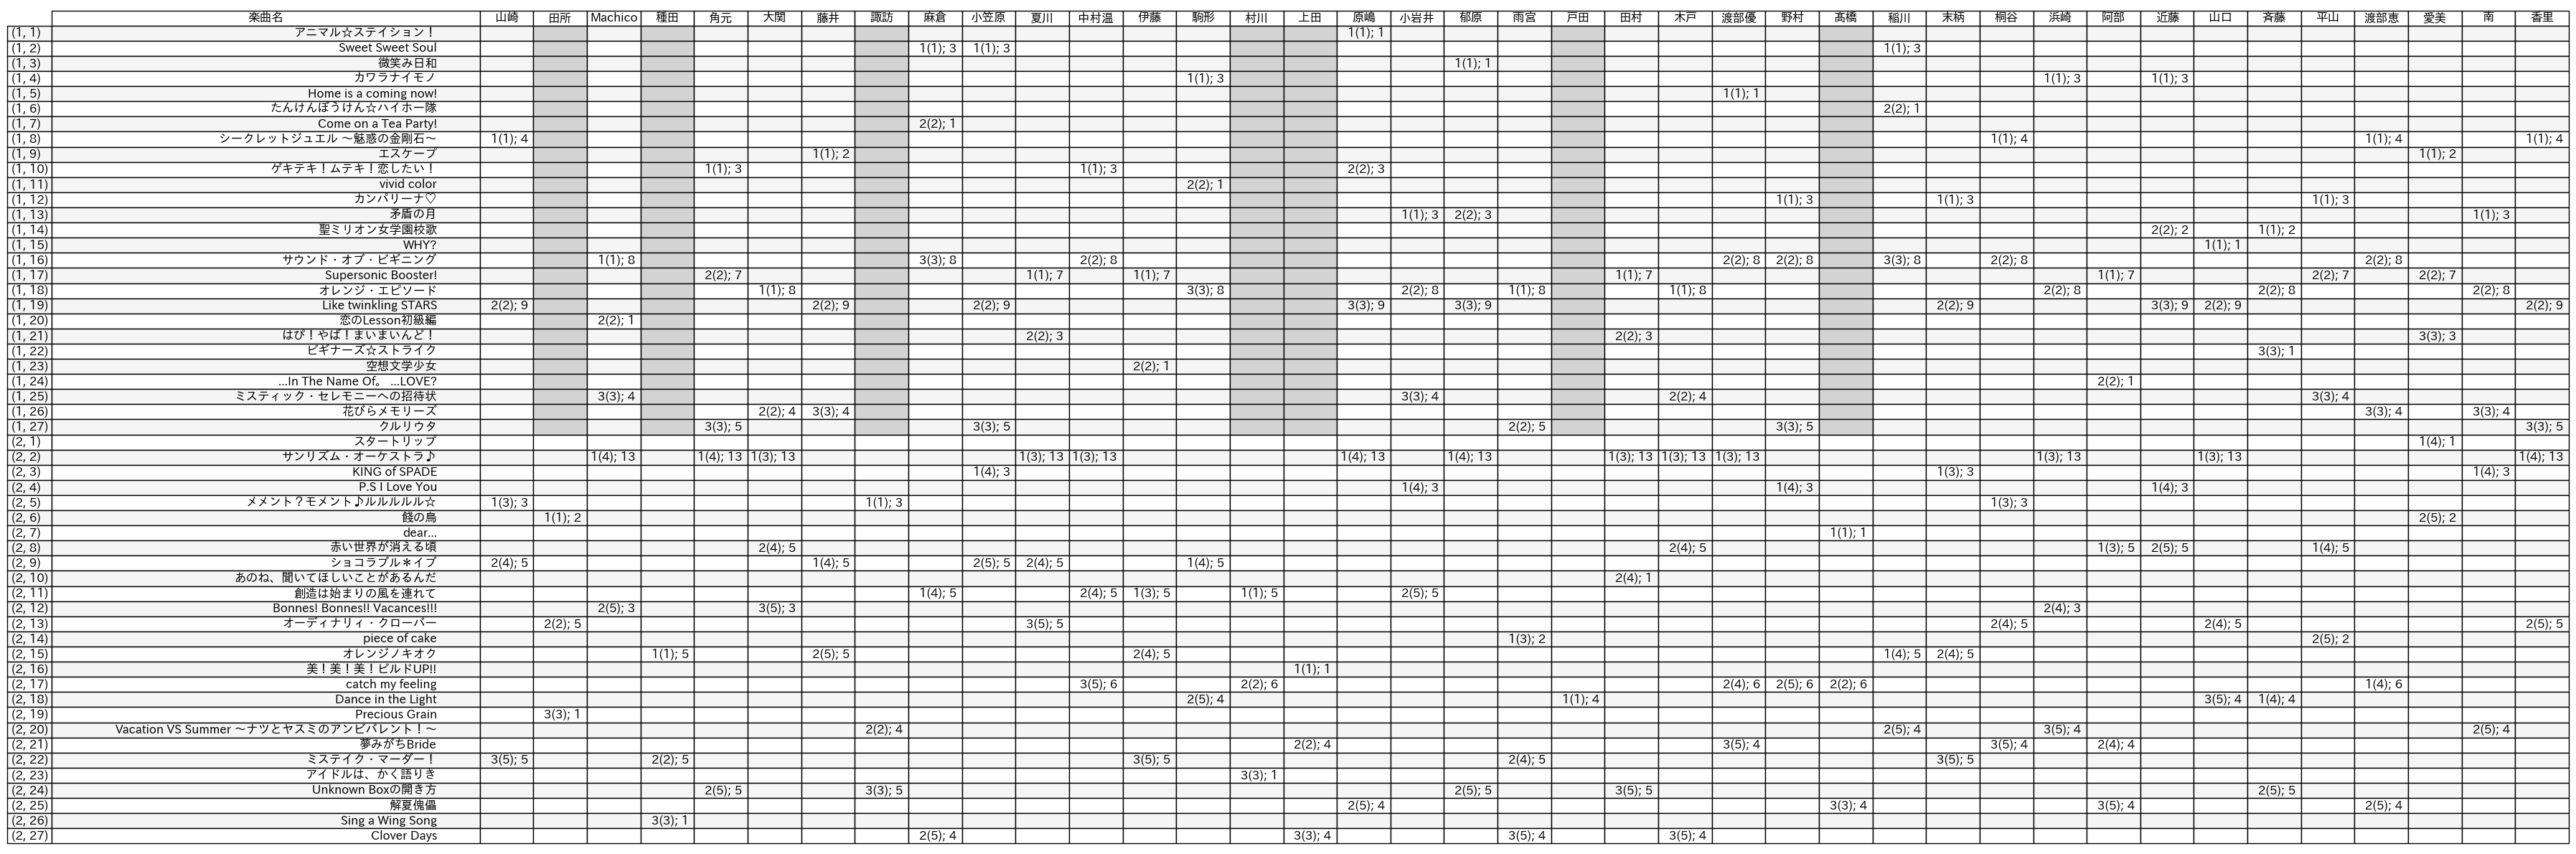

In [43]:
# 画像出力
fig, ax = plt.subplots(figsize=(36, 12 / 55 * (1 + LIVE_DAYS * SONGS_PERFORMANCE_DAILY)))

ax.axis('off')
ax.axis('tight')

# 列ごとの幅を指定
song_space = 8
col_widths = [song_space] + [1 for cast in cast_id.keys()]
col_widths = [val / (song_space + len(cast_id)) for val in col_widths]

table = ax.table(
    cellText=df_for_image.values,
    colLabels=df_for_image.columns,
    rowLabels=df_for_image.index,
    rowColours=row_color,
    loc="center",
    colWidths=col_widths,
    cellColours=cell_color
)

# フォントサイズの設定
font_size = 12
# フォントサイズの設定
table.auto_set_font_size(False)
table.set_fontsize(font_size)

plt.tight_layout()

plt.savefig(
    dir_path + f'results/optimized_setlist_{opt_id}.png',
    bbox_inches="tight"
)

plt.show()